**Problem 1**

In [33]:
%reset -f
from functions import *

theta1, theta2, theta3, theta4, theta5, theta6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
l1, l2, l3, l4 = sp.symbols('l1 l2 l3 l4')
DH_list = [[theta1, 0,0,pi/2],
            [theta2, -l1, l2, 0],
            [theta3, 0, 0, -pi/2],
            [theta4, l3, 0, pi/2], 
            [theta5, 0, 0, pi/2],
            [theta6, l4, 0, 0]]

display(sp.Matrix(DH_list))

Matrix([
[theta1,   0,  0,  pi/2],
[theta2, -l1, l2,     0],
[theta3,   0,  0, -pi/2],
[theta4,  l3,  0,  pi/2],
[theta5,   0,  0,  pi/2],
[theta6,  l4,  0,     0]])

**Problem 2**

In [34]:
A = sp.Matrix([ [1,0,0,3],
                [0,1/sp.sqrt(2),-1/sp.sqrt(2),0],
                [0,1/sp.sqrt(2),1/sp.sqrt(2),0],
                [0,0,0,1]])

theta_sym, d_sym, a_sym, alpha_sym = sp.symbols('theta d a alpha')

peram = find_denevit_hartenberg_perameters_from_transformation(A)
display(A)
display(peram)

Matrix([
[1,         0,          0, 3],
[0, sqrt(2)/2, -sqrt(2)/2, 0],
[0, sqrt(2)/2,  sqrt(2)/2, 0],
[0,         0,          0, 1]])

{a: 3, alpha: pi/4, d: 0, theta: 0}

**Problem 5**

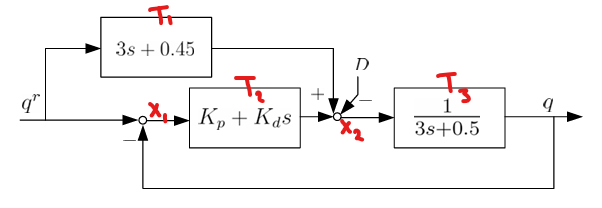

In [ ]:
%reset -f
from functions import *

# Variables
qr, q, T1, T2, T3, D = sp.symbols('qr q T1 T2 T3 D')
x1, x2 = sp.symbols('x1 x2')
s = sp.symbols('s')
Kp, Kd = sp.symbols('K_p K_d')

# Blocks from diagram
T1 = 3*s + 0.45
T2 = Kp + Kd*s
T3 = 1/(3*s+0.5)

# Equation from nodes
eq1 = sp.Eq(x1, qr - q)
eq2 = sp.Eq(x2, x1*T2 + qr*T1 - D)
eq3 = sp.Eq(q, x2*T3)
sol = sp.solve([eq1, eq2, eq3], (q, x1, x2))

q = Normalize_fraction(sol[q].simplify() , 20)
display(q)


# Steady state error
input = qr
output = q
error = (input - output).subs({D:0.2/s, qr:2/s})
display((error))

Ess = sp.limit(error*s, s, 0)
print(f"Steady state error:")
display(Ess)

Kp = sp.solve(sp.Eq(Ess, 0.01), Kp)[0]
print(f"Kp:")
display(Kp)


(-1.0*D + 1.0*K_d*qr*s + 1.0*K_p*qr + 3.0*qr*s + 0.45*qr)/(1.0*K_d*s + 1.0*K_p + 3.0*s + 0.5)

-(2.0*K_d + 2.0*K_p/s + 6.0 + 0.7/s)/(1.0*K_d*s + 1.0*K_p + 3.0*s + 0.5) + 2/s

Steady state error:


3/(10*K_p + 5)

Kp:


29.5000000000000